## 1、探索性数据分析

In [54]:
# 引入相应的库包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
# 读取数据集
df = pd.read_csv('./dataset/students_academic_performance.csv')

In [4]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [5]:
df.shape

(480, 17)

In [7]:
# 检查数据集是否有空缺值
print(df.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [8]:
# 检查每个特征的数据类型
print(df.dtypes)

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


In [9]:
df.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [11]:
#查看分类型特征(categorical feature) 中有哪些具体分类
print('Relation',df['Relation'].unique())

Relation ['Father' 'Mum']


In [12]:
#查看最终结果中有哪些分类
print('Class',df['Class'].unique())

Class ['M' 'L' 'H']


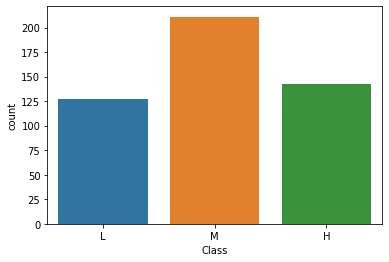

In [13]:
# 检查数据集是否平衡
sns.countplot(x='Class',order=['L','M','H'],data=df)

## 2、数据可视化分析

### 2.1 分类型特征之间的可视化

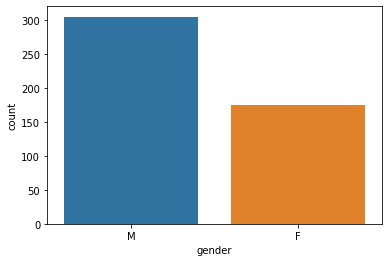

In [14]:
sns.countplot(x='gender',data=df)

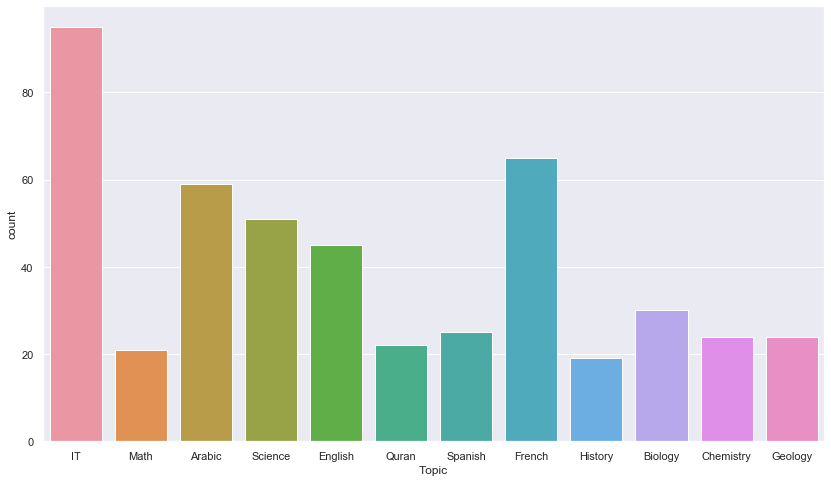

In [15]:
# 了解学科的分布情况
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(x='Topic',data=df)

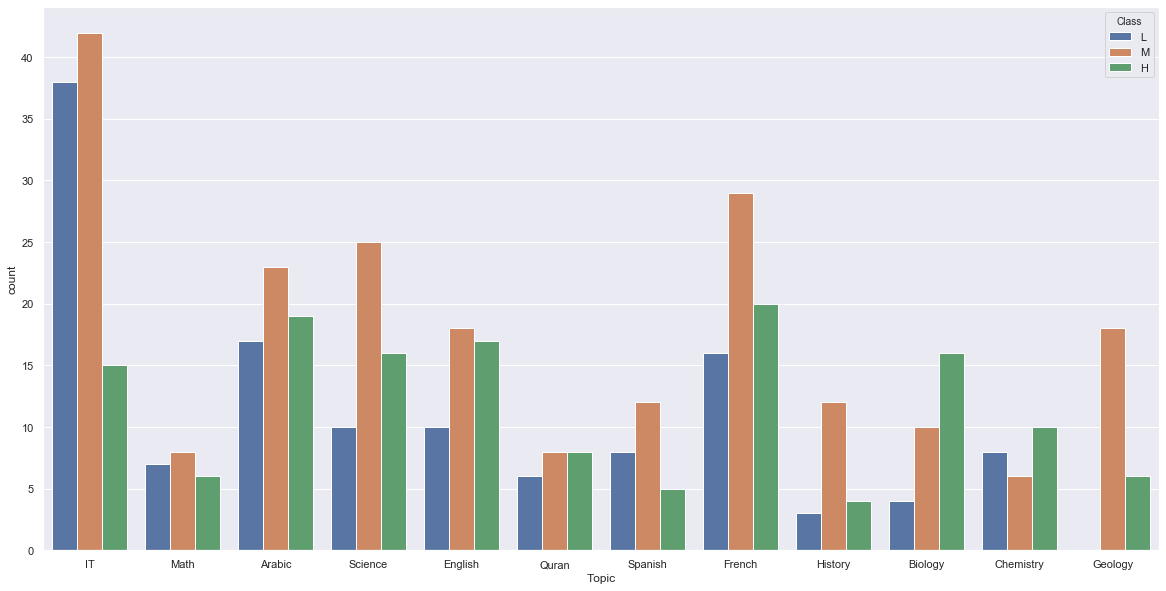

In [17]:
# 了解课程和成绩的相关性
sns.set({'figure.figsize':(20,10)})
sns.countplot(x='Topic',hue='Class',hue_order = ['L','M','H'],data = df)

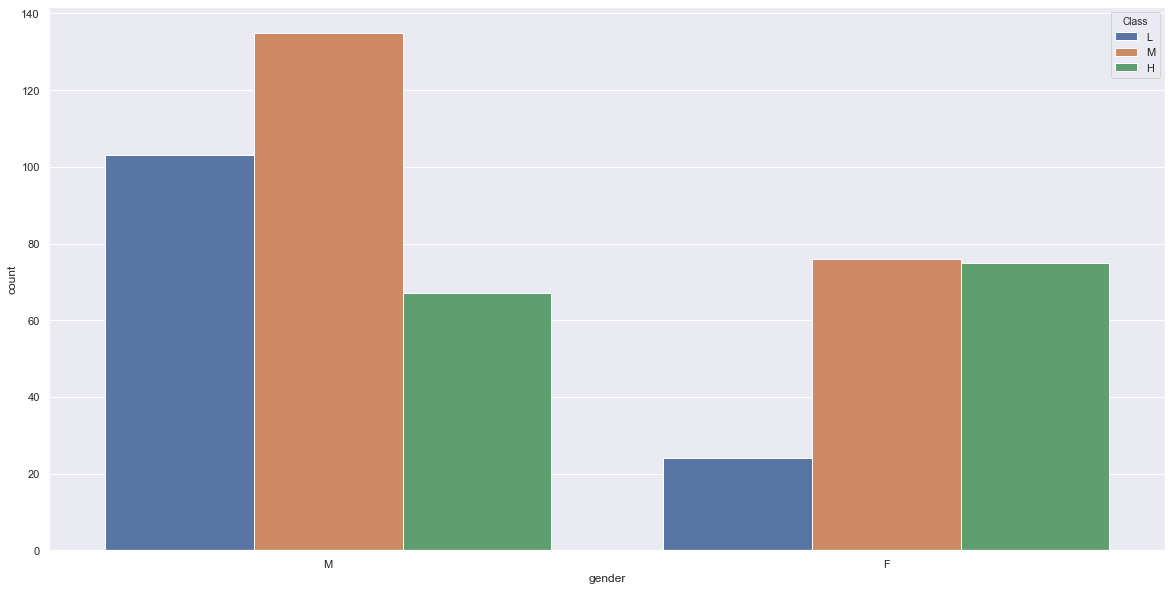

In [20]:
# 了解性别和成绩的相关性
sns.countplot(x='gender',hue='Class',hue_order=['L','M','H'],data=df)

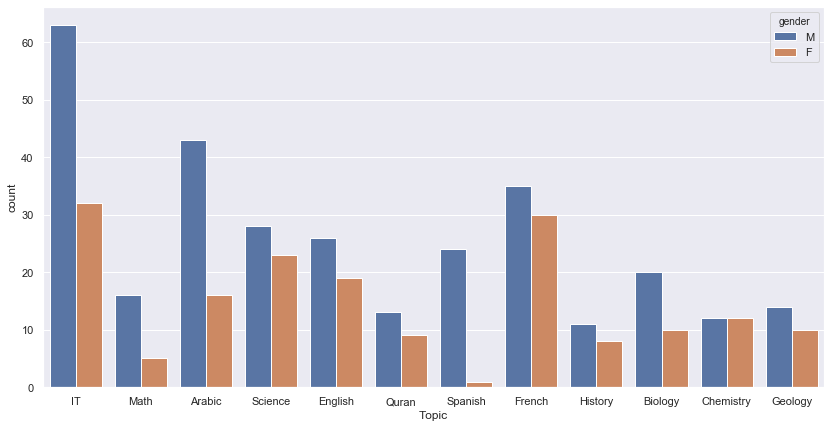

In [21]:
# 了解性别和学科之间的相关性
sns.set({'figure.figsize':(14,7)})
sns.countplot(x='Topic',hue='gender',data=df)

In [29]:
df_temp = df[['Topic','gender']]
df_temp['Count'] = 1
df_temp = df_temp.groupby(['Topic','gender']).agg('sum').reset_index()
df_temp.head(4)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Topic,gender,Count
0,Arabic,F,16
1,Arabic,M,43
2,Biology,F,10
3,Biology,M,20


In [31]:
df_temp2 = df_temp
df_temp2 = df_temp2.groupby('Topic').agg('sum').reset_index()
df_temp2.head(4)

,Topic,Count
0,Arabic,59
1,Biology,30
2,Chemistry,24
3,English,45


In [32]:
df_temp = pd.merge(df_temp,df_temp2,on=('Topic'),how='left')
df_temp.head(5)

,Topic,gender,Count_x,Count_y
0,Arabic,F,16,59
1,Arabic,M,43,59
2,Biology,F,10,30
3,Biology,M,20,30
4,Chemistry,F,12,24


In [33]:
df_temp['gender proportion in topic'] = df_temp['Count_x']/df_temp['Count_y']
df_temp.head(4)

,Topic,gender,Count_x,Count_y,gender proportion in topic
0,Arabic,F,16,59,0.271186
1,Arabic,M,43,59,0.728814
2,Biology,F,10,30,0.333333
3,Biology,M,20,30,0.666667


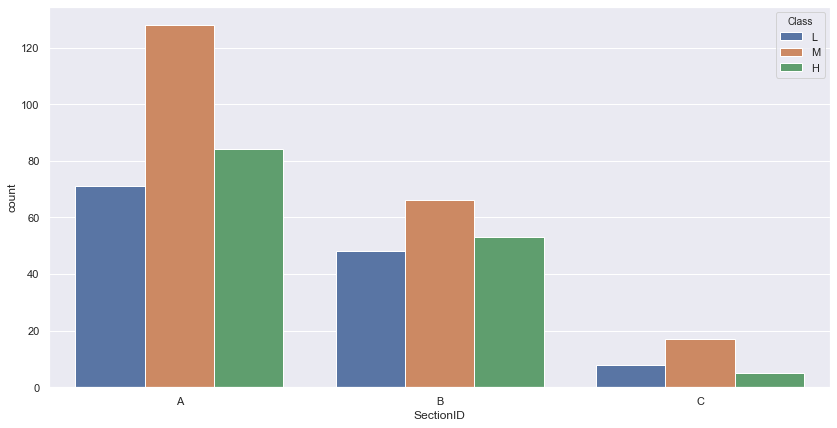

In [34]:
#了解班级和成绩的相关性
sns.countplot(x='SectionID',hue='Class',data=df,hue_order=['L','M','H'])

## 3.2 分类型特征和数字型特征之间的可视化 

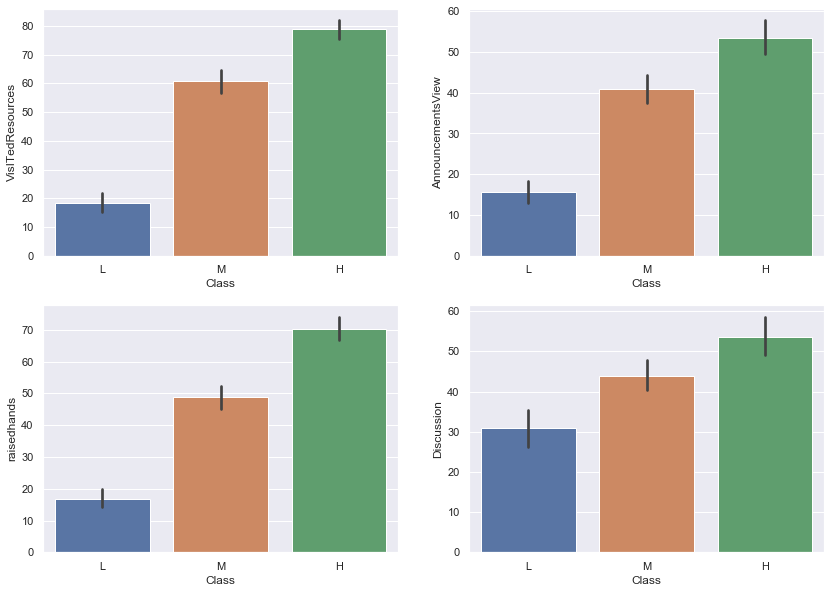

In [36]:
fig,axes = plt.subplots(2,2,figsize=(14,10))
sns.barplot(x = 'Class',y = 'VisITedResources',data = df, order = ['L','M','H'], ax = axes[0,0])
sns.barplot(x = 'Class',y = 'AnnouncementsView',data = df, order = ['L','M','H'],ax = axes[0,1])
sns.barplot(x = 'Class',y = 'raisedhands',data = df, order = ['L','M','H'],ax = axes[1,0])
sns.barplot(x = 'Class',y = 'Discussion',data = df, order = ['L','M','H'],ax = axes[1,1])

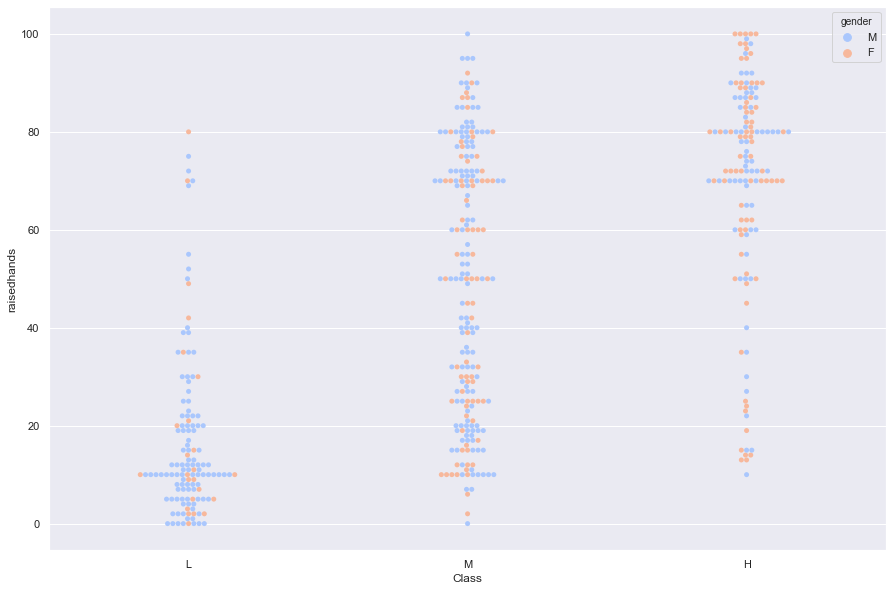

In [39]:
# 了解不同性别情况下，举手次数和成绩的相关性
sns.set(rc={'figure.figsize':(15,10)})
sns.swarmplot(x='Class',y='raisedhands',hue='gender',data=df,palette='coolwarm',order=['L','M','H'])

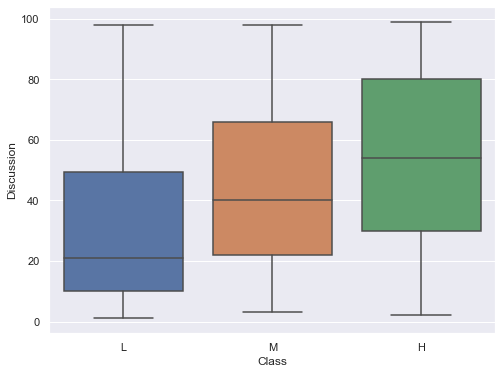

In [40]:
# 了解上课讨论积极程度和成绩的重要性
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='Class',y='Discussion',data=df,order=['L','M','H'])

### 2.3 数字型特征之间的可视化


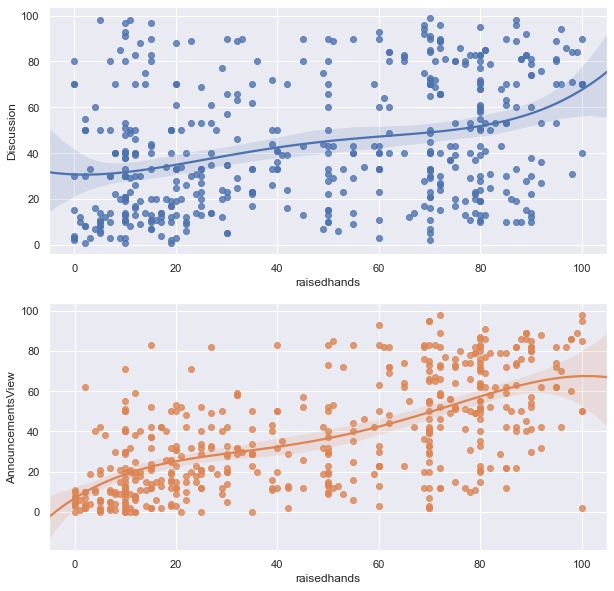

In [43]:
# 了解四个课堂课后量化表现之间的相关性
fig,axes = plt.subplots(2,1,figsize=(10,10))
sns.regplot(x='raisedhands',y='Discussion',order=4,data=df,ax=axes[0])
sns.regplot(x='raisedhands',y='AnnouncementsView',order=4,data=df,ax=axes[1])

In [44]:
# correlation matrix相关性矩阵
corr = df[['VisITedResources','raisedhands','AnnouncementsView','Discussion']].corr()
corr

,VisITedResources,raisedhands,AnnouncementsView,Discussion
VisITedResources,1.000000,0.691572,0.594500,0.243292
raisedhands,0.691572,1.000000,0.643918,0.339386
AnnouncementsView,0.594500,0.643918,1.000000,0.417290
Discussion,0.243292,0.339386,0.417290,1.000000


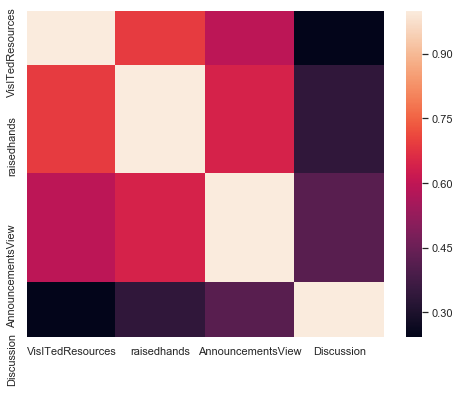

In [46]:
# correlation Matrix Visualization 相关性矩阵可视化
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

In [48]:
# Feature Engineering 特征工程
X = df.drop('Class',axis=1)
Y = df['Class']
X = pd.get_dummies(X) #数值化
X.head(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,42,30,13,70,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
6,35,12,0,17,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7,50,10,15,22,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
8,12,21,16,50,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
9,70,80,25,70,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [50]:
X.shape

(480, 72)

In [52]:
# Get Train and Test Dataset区分训练集合测试集
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

In [55]:
# Fit and Predict 训练模型并检测准确率
Logit = LogisticRegression()
Logit.fit(x_train,y_train)
Predict = Logit.predict(x_test)
print('Predict',Predict)
Score = accuracy_score(y_test,Predict)
Score

Predict ['H' 'M' 'M' 'L' 'H' 'H' 'M' 'H' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'H' 'L' 'H'
 'H' 'H' 'L' 'M' 'M' 'M' 'M' 'L' 'H' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'M' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'H' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'H' 'M'
 'M' 'H' 'H' 'L' 'M' 'M' 'H' 'L' 'H' 'M' 'L' 'M' 'M' 'M' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'M' 'M' 'L' 'H' 'H' 'L' 'M' 'L' 'L' 'M' 'H' 'L' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6666666666666666

[教学视频地址](https://tianchi.aliyun.com/course/video?spm=5176.12474271.0.0.4ba343911rgdPQ&liveId=7729)